Importing libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier, RUSBoostClassifier

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 10)  # Limit number of rows displayed
pd.set_option('display.width', 1000)  # Set max width for table
pd.set_option('display.colheader_justify', 'center')  # Center-align column headers

In [3]:
df = pd.read_csv('data/creditcard.csv')
print(df.head())
print(df.columns)

   Time     V1        V2        V3        V4        V5        V6        V7        V8        V9        V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28    Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62    0  
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69    0  
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.

In [4]:
def annotate_bars(ax, fmt="{:.2f}%", color="black", fontsize=10, ha="center", va="bottom", padding=0.1):
    for bar in ax.patches:
        # Get the bar's dimensions
        x = bar.get_x() + bar.get_width() / 2  # Middle of the bar
        y = bar.get_height()               # Middle height of the bar (for vertical bars)
        value = bar.get_height()              # Value of the bar

        # Annotate the bar
        ax.text(x, y + padding, fmt.format(value), ha=ha, va=va, fontsize=fontsize, color=color)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
         ..
V26       0
V27       0
V28       0
Amount    0
Class     0
Length: 31, dtype: int64


Non-fraud: 284315
Fraud: 492
Other: 0


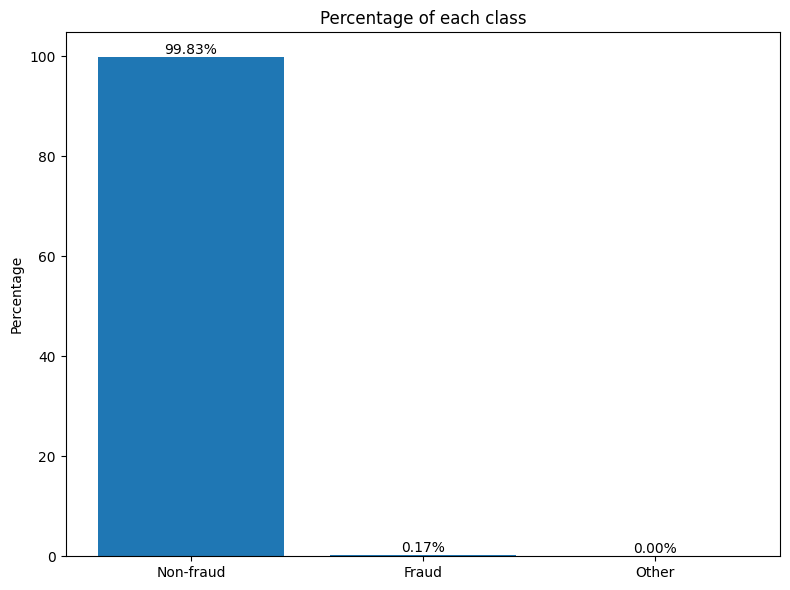

In [7]:
count_non_fraud = df[df['Class'] == 0]
count_fraud = df[df['Class'] == 1]
count_other = df[(df['Class'] != 1) & (df['Class'] != 0)]
print(f'Non-fraud: {count_non_fraud.shape[0]}\nFraud: {count_fraud.shape[0]}\nOther: {count_other.shape[0]}')

total = count_non_fraud.shape[0] + count_fraud.shape[0] + count_other.shape[0]
percentage_non_fraud = count_non_fraud.shape[0] / total * 100
percentage_fraud = count_fraud.shape[0] / total * 100
percentage_other = count_other.shape[0] / total * 100

plt.figure(figsize=(8, 6))
plt.bar(['Non-fraud', 'Fraud', 'Other'], [percentage_non_fraud, percentage_fraud, percentage_other])
annotate_bars(plt.gca())
plt.ylabel('Percentage')
plt.title('Percentage of each class')
plt.tight_layout()
plt.show()


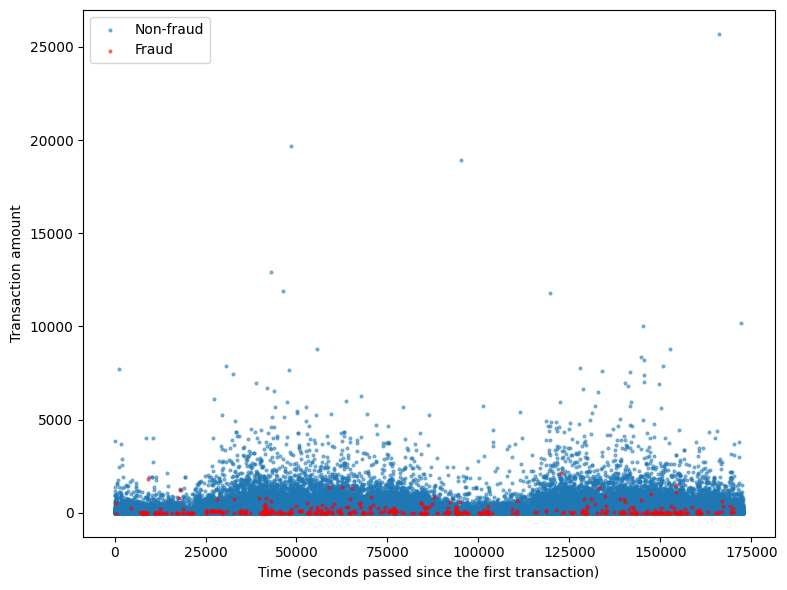

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df['Time'][df['Class'] == 0], df['Amount'][df['Class'] == 0], label='Non-fraud', alpha=0.5, s=4)
plt.scatter(df['Time'][df['Class'] == 1], df['Amount'][df['Class'] == 1], label='Fraud', alpha=0.5, s=4, c='red')
plt.xlabel('Time (seconds passed since the first transaction)')
plt.ylabel('Transaction amount')
plt.tight_layout()
plt.legend()

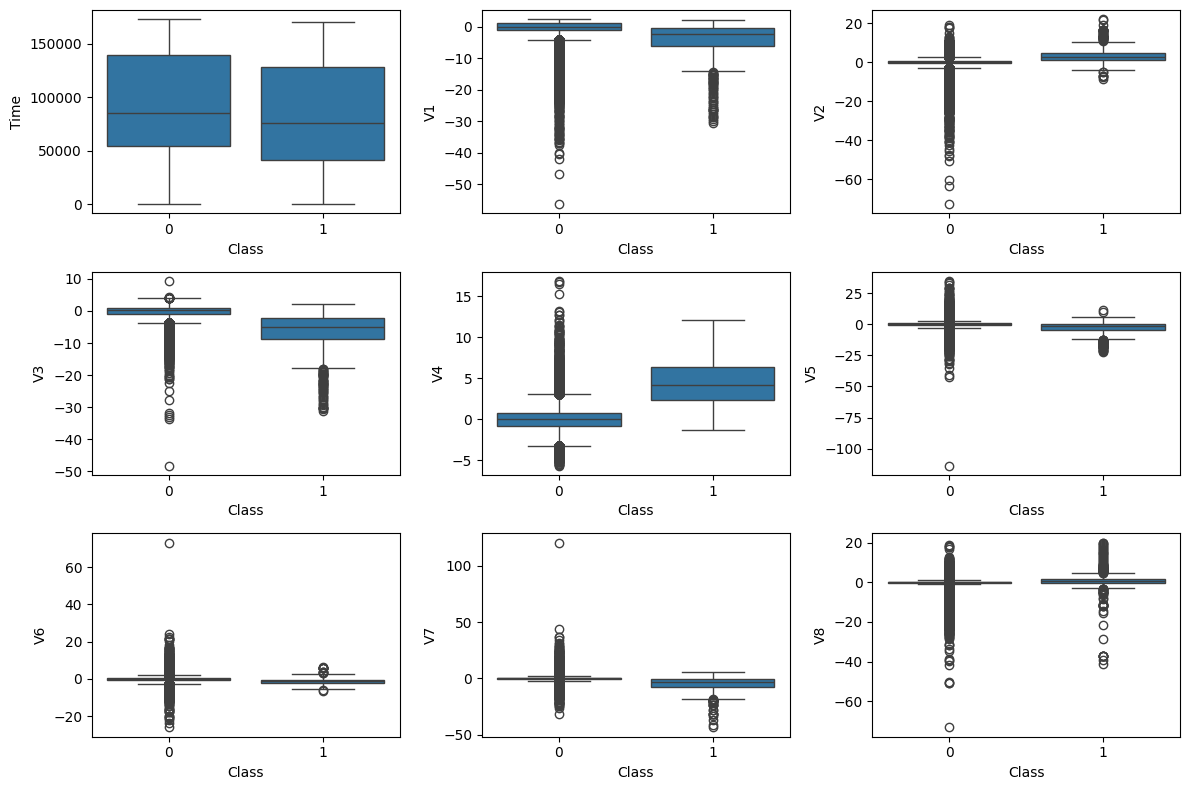

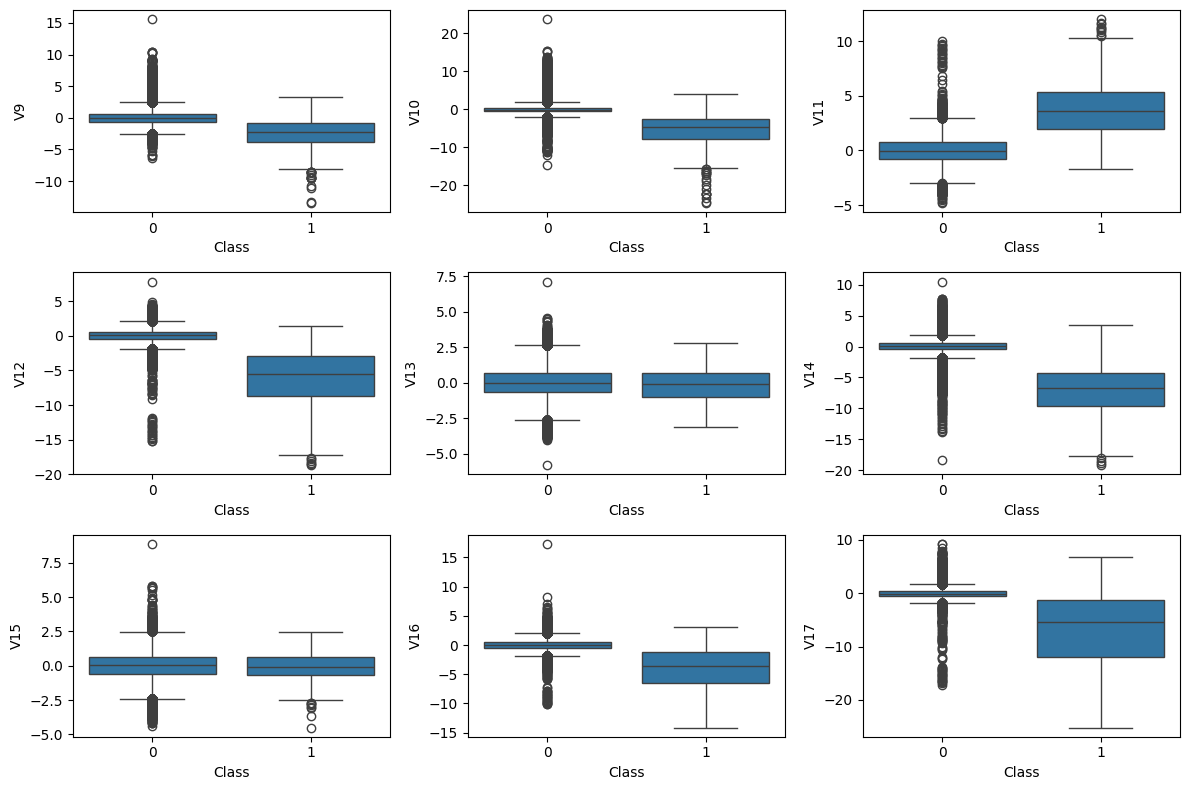

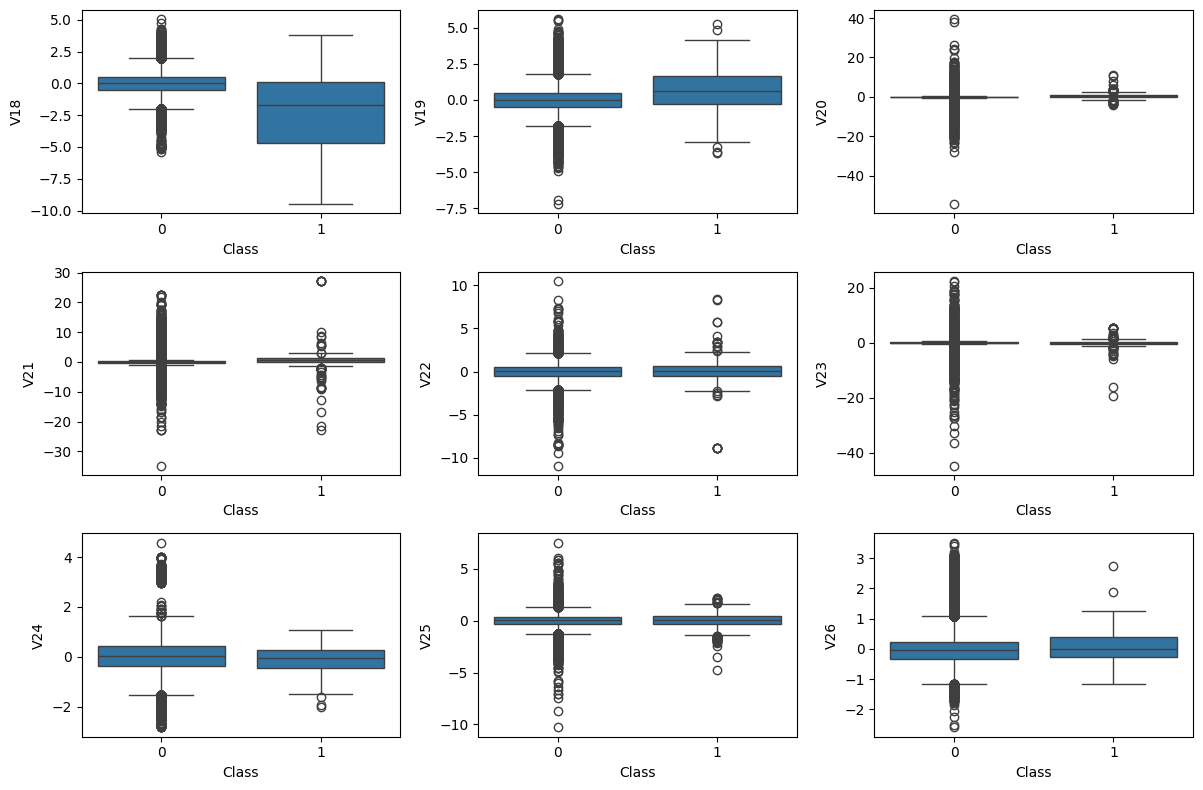

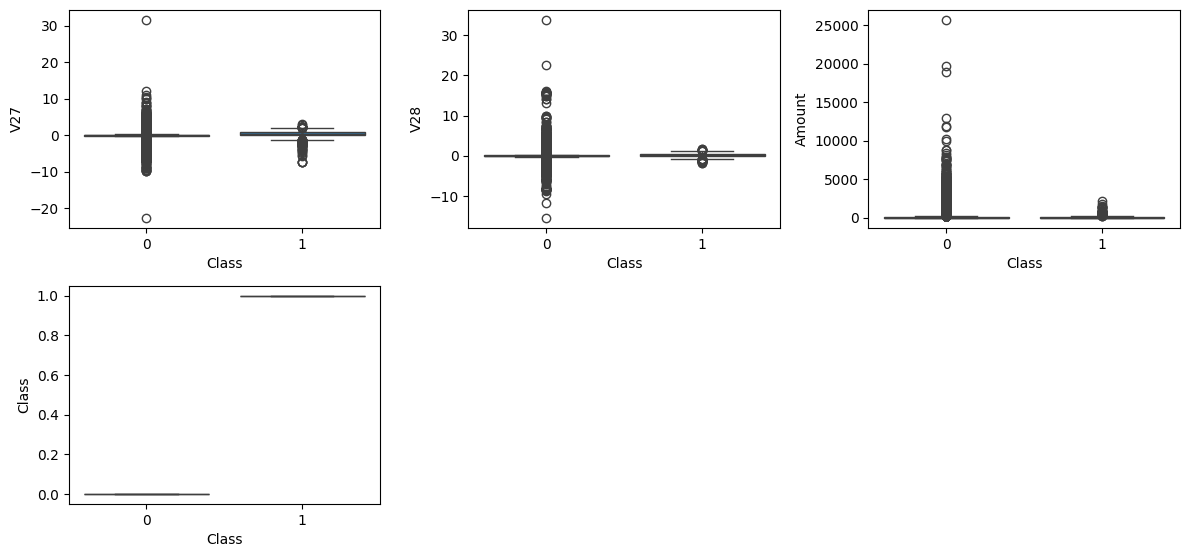

In [9]:
# fig, ax = plt.subplots(3, 3, figsize=(12,8))
# for i, column in enumerate(df.columns[:-1]):
#     x = i % 3 
#     sns.boxplot(x='Class', y=column, data=df, ax=ax[i//3, x])
# plt.tight_layout()
# plt.show()
plots_per_fig = 9
n_rows, n_cols = 3, 3

chunks = [df.columns[i:i+plots_per_fig] for i in range(0, len(df.columns)-1, plots_per_fig)]

for chunk_idx, chunk in enumerate(chunks):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,8))
    axes = axes.flatten()
    for i, column in enumerate(chunk):
        ax = axes[i]
        sns.boxplot(x='Class', y=column, data=df, ax=ax)
    for unused_ax in axes[len(chunk):]:
        unused_ax.set_visible(False)
    plt.tight_layout()
    plt.show()

In [10]:
print("Non-fradulent transactions:")
print(count_non_fraud.Amount.describe())
print("\nFraudulent transactions:")
print(count_fraud.Amount.describe())

Non-fradulent transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [11]:
print(df.groupby('Class').mean())

           Time         V1        V2        V3        V4        V5        V6        V7        V8        V9        V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28      Amount  
Class                                                                                                                                                                                                                                                                                                                  
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453  0.002419  0.009637 -0.000987  0.004467  0.009824 -0.006576  0.010832  0.000189  0.012064  0.000161  0.007164  0.011535  0.003887 -0.001178 -0.000644 -0.001235 -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   88.291022
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.1

Idiotic solution: just sampling the same amount of non-frauds as frauds

In [12]:
non_fraud_sample = count_non_fraud.sample(n=count_fraud.shape[0])
idiotic_df = pd.concat([non_fraud_sample, count_fraud], axis=0)
print(idiotic_df.shape)

X_idiotic = idiotic_df.drop('Class', axis=1)
y_idiotic = idiotic_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_idiotic, y_idiotic, test_size=0.2, random_state=42)
print(X_idiotic.shape, X_train.shape, X_test.shape)

standard_scaler = StandardScaler()
model_logistic_regression = LogisticRegression(solver='saga', max_iter=5000)

pipeline = make_pipeline(standard_scaler, model_logistic_regression)
pipeline.fit(X_train, y_train)

X_train_predict = pipeline.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_predict)

X_test_predict = pipeline.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, X_test_predict)

print(f'Training data accuracy: {training_data_accuracy}')
print(f'Testing data accuracy: {testing_data_accuracy}')

(984, 31)
(984, 30) (787, 30) (197, 30)
Training data accuracy: 0.9542566709021602
Testing data accuracy: 0.9441624365482234


Again, same idiotic approach, but fit_transform instead of a pipeline

In [13]:
non_fraud_sample = count_non_fraud.sample(n=count_fraud.shape[0])
idiotic_df = pd.concat([non_fraud_sample, count_fraud], axis=0)
print(idiotic_df.shape)

X_idiotic = idiotic_df.drop('Class', axis=1)
y_idiotic = idiotic_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_idiotic, y_idiotic, test_size=0.2, random_state=42)
print(X_idiotic.shape, X_train.shape, X_test.shape)

standard_scaler = StandardScaler()
model_logistic_regression = LogisticRegression(solver='saga', max_iter=5000)

X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

model_logistic_regression.fit(X_train_scaled, y_train)

X_train_predict = model_logistic_regression.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train, X_train_predict)

X_test_predict = model_logistic_regression.predict(X_test_scaled)
testing_data_accuracy = accuracy_score(y_test, X_test_predict)

print(f'Training data accuracy: {training_data_accuracy}')
print(f'Testing data accuracy: {testing_data_accuracy}')

(984, 31)
(984, 30) (787, 30) (197, 30)
Training data accuracy: 0.9529860228716646
Testing data accuracy: 0.9289340101522843


Defining the dataset and cross-validator for the next experiments

In [14]:
dataset = pd.concat([count_non_fraud, count_fraud], axis=0)
dataset = dataset.sample(frac=1, random_state=42)
print(dataset.shape)

X = dataset.drop('Class', axis=1)
y = dataset['Class']

X = X[1:5000]
y = y[1:5000]
print(X.shape)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

(284807, 31)
(4999, 30)


Logistic regression - whole dataset

c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1:
  Accuracy: 0.9990, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.5000, ROC-AUC: 0.8569
[[999   0]
 [  1   0]]


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 2:
  Accuracy: 0.9980, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.5000, ROC-AUC: 0.2725
[[998   0]
 [  2   0]]


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 3:
  Accuracy: 0.9980, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.5000, ROC-AUC: 0.1814
[[998   0]
 [  2   0]]


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 4:
  Accuracy: 0.9980, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.5000, ROC-AUC: 0.7064
[[998   0]
 [  2   0]]
Fold 5:
  Accuracy: 0.9990, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.5000, ROC-AUC: 0.9689
[[998   0]
 [  1   0]]
Mean Accuracy: 0.9984
Mean Precision: 0.0000
Mean Recall: 0.0000
Mean F1: 0.0000
Mean Balanced Accuracy: 0.5000
Mean ROC-AUC: 0.5972


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


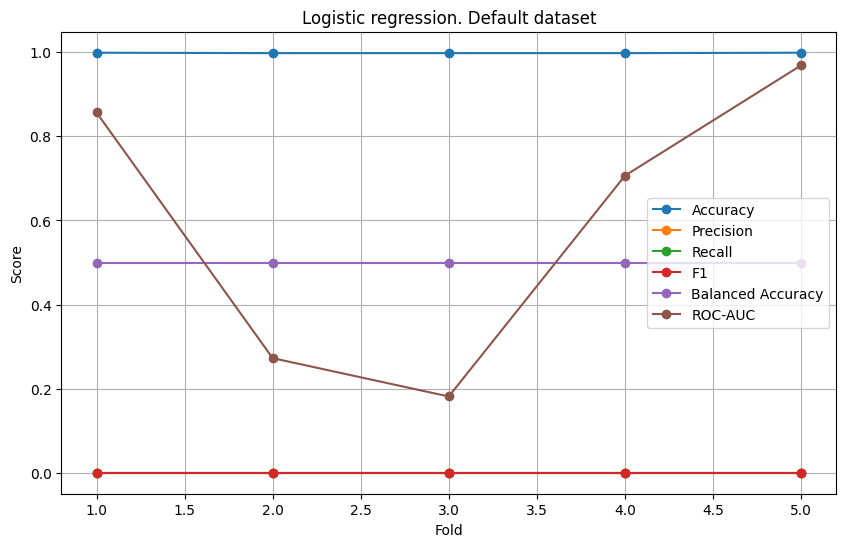

In [26]:
model = LogisticRegression(solver='saga', max_iter=5000)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('Logistic regression. Default dataset')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

Oversampling added

(3999, 30) (1000, 30)
(7984, 30) (1000, 30)


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 1:
  Accuracy: 0.5790, Precision: 0.0024, Recall: 1.0000, F1: 0.0047
  Balanced Accuracy: 0.7893, ROC-AUC: 0.8569
[[578 421]
 [  0   1]]
(3999, 30) (1000, 30)
(7986, 30) (1000, 30)
Fold 2:
  Accuracy: 0.9220, Precision: 0.0250, Recall: 1.0000, F1: 0.0488
  Balanced Accuracy: 0.9609, ROC-AUC: 1.0000
[[920  78]
 [  0   2]]
(3999, 30) (1000, 30)
(7986, 30) (1000, 30)


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 3:
  Accuracy: 0.9970, Precision: 0.3333, Recall: 0.5000, F1: 0.4000
  Balanced Accuracy: 0.7490, ROC-AUC: 0.7019
[[996   2]
 [  1   1]]
(3999, 30) (1000, 30)
(7986, 30) (1000, 30)


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 4:
  Accuracy: 0.5260, Precision: 0.0042, Recall: 1.0000, F1: 0.0084
  Balanced Accuracy: 0.7625, ROC-AUC: 0.9649
[[524 474]
 [  0   2]]
(4000, 30) (999, 30)
(7986, 30) (999, 30)
Fold 5:
  Accuracy: 0.5225, Precision: 0.0021, Recall: 1.0000, F1: 0.0042
  Balanced Accuracy: 0.7610, ROC-AUC: 0.8938
[[521 477]
 [  0   1]]
Mean Accuracy: 0.7093
Mean Precision: 0.0734
Mean Recall: 0.9000
Mean F1: 0.0932
Mean Balanced Accuracy: 0.8046
Mean ROC-AUC: 0.8835


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


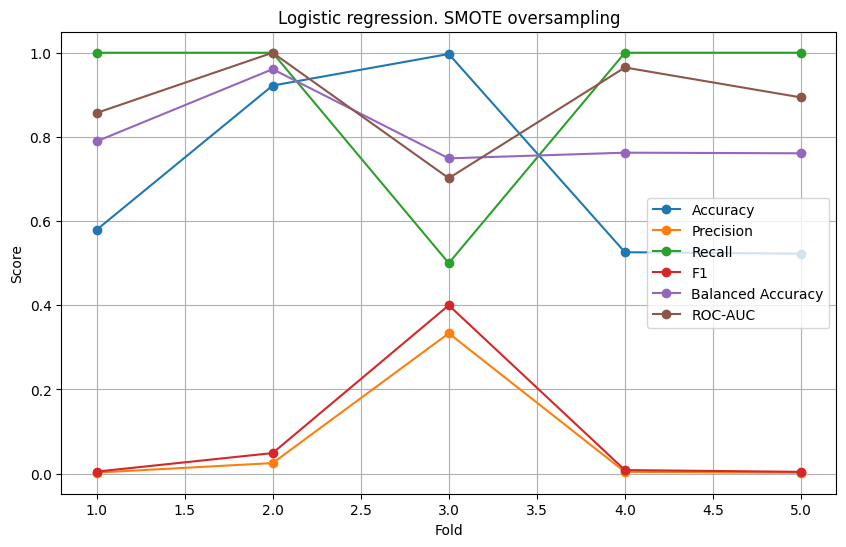

In [27]:
model = LogisticRegression(solver='saga', max_iter=5000)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(X_train.shape, X_test.shape)
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(X_train.shape, X_test.shape)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('Logistic regression. SMOTE oversampling')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

Undersampling added

(3999, 30) (1000, 30)
(14, 30) (1000, 30)
Fold 1:
  Accuracy: 0.0070, Precision: 0.0010, Recall: 1.0000, F1: 0.0020
  Balanced Accuracy: 0.5030, ROC-AUC: 0.1792
[[  6 993]
 [  0   1]]
(3999, 30) (1000, 30)
(12, 30) (1000, 30)
Fold 2:
  Accuracy: 0.9980, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.5000, ROC-AUC: 0.2725
[[998   0]
 [  2   0]]
(3999, 30) (1000, 30)
(12, 30) (1000, 30)
Fold 3:
  Accuracy: 0.9980, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.5000, ROC-AUC: 0.1824
[[998   0]
 [  2   0]]
(3999, 30) (1000, 30)
(12, 30) (1000, 30)
Fold 4:
  Accuracy: 0.0050, Precision: 0.0020, Recall: 1.0000, F1: 0.0040
  Balanced Accuracy: 0.5015, ROC-AUC: 0.2966
[[  3 995]
 [  0   2]]
(4000, 30) (999, 30)
(14, 30) (999, 30)
Fold 5:
  Accuracy: 0.0100, Precision: 0.0010, Recall: 1.0000, F1: 0.0020
  Balanced Accuracy: 0.5045, ROC-AUC: 0.0361
[[  9 989]
 [  0   1]]
Mean Accuracy: 0.4036
Mean Precision: 0.0008
Mean Recall: 0.6000
Mean F1: 0.0016
M

c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimiza

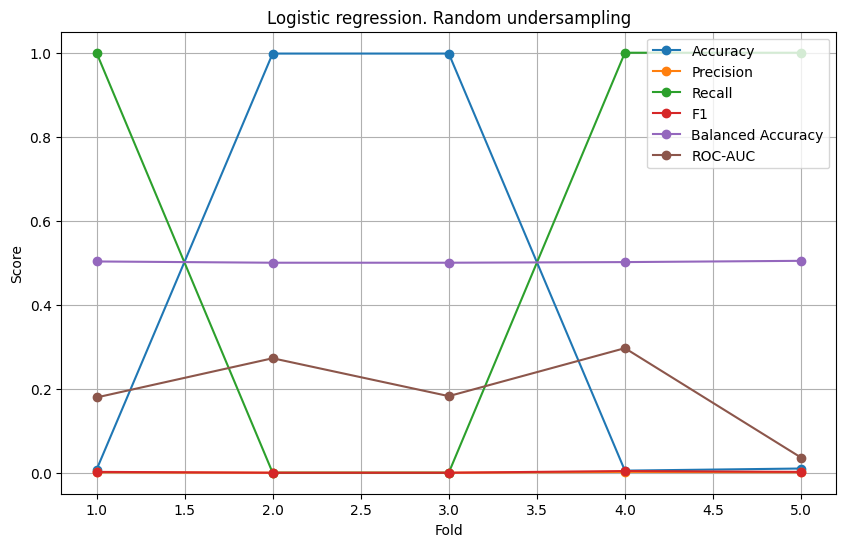

In [28]:
model = LogisticRegression(solver='saga', max_iter=5000)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(X_train.shape, X_test.shape)
    undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
    X_train, y_train = undersampler.fit_resample(X_train, y_train)
    print(X_train.shape, X_test.shape)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('Logistic regression. Random undersampling')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

SVM - oversampling

(3999, 30) (1000, 30)
(7984, 30) (1000, 30)
Fold 1:
  Accuracy: 0.6190, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.3098, ROC-AUC: 0.2533
[[619 380]
 [  1   0]]
(3999, 30) (1000, 30)
(7986, 30) (1000, 30)
Fold 2:
  Accuracy: 0.3750, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.1879, ROC-AUC: 0.2695
[[375 623]
 [  2   0]]
(3999, 30) (1000, 30)
(7986, 30) (1000, 30)
Fold 3:
  Accuracy: 0.3010, Precision: 0.0014, Recall: 0.5000, F1: 0.0029
  Balanced Accuracy: 0.4003, ROC-AUC: 0.1784
[[300 698]
 [  1   1]]
(3999, 30) (1000, 30)
(7986, 30) (1000, 30)
Fold 4:
  Accuracy: 0.6410, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.3211, ROC-AUC: 0.5165
[[641 357]
 [  2   0]]
(4000, 30) (999, 30)
(7986, 30) (999, 30)
Fold 5:
  Accuracy: 0.6396, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.3201, ROC-AUC: 0.2906
[[639 359]
 [  1   0]]
Mean Accuracy: 0.5151
Mean Precision: 0.0003
Mean Recall: 0.1000
Mean F1

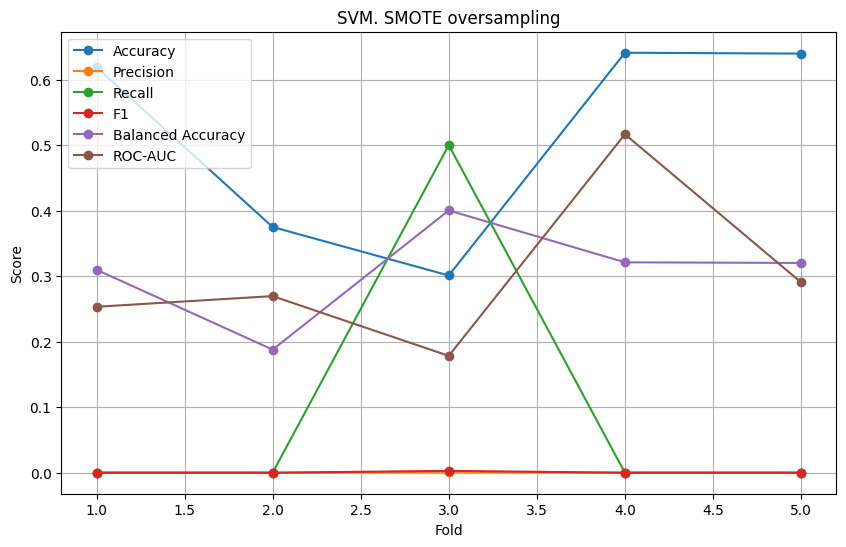

In [30]:
model = SVC(probability=True)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(X_train.shape, X_test.shape)
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(X_train.shape, X_test.shape)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('SVM. SMOTE oversampling')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

SVM - undersampling

(3999, 30) (1000, 30)
(14, 30) (1000, 30)
Fold 1:
  Accuracy: 0.5610, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2808, ROC-AUC: 0.9680
[[561 438]
 [  1   0]]
(3999, 30) (1000, 30)
(12, 30) (1000, 30)
Fold 2:
  Accuracy: 0.5250, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2630, ROC-AUC: 0.2685
[[525 473]
 [  2   0]]
(3999, 30) (1000, 30)
(12, 30) (1000, 30)
Fold 3:
  Accuracy: 0.4600, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2305, ROC-AUC: 0.2382
[[460 538]
 [  2   0]]
(3999, 30) (1000, 30)
(12, 30) (1000, 30)
Fold 4:
  Accuracy: 0.5560, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2786, ROC-AUC: 0.6949
[[556 442]
 [  2   0]]
(4000, 30) (999, 30)
(14, 30) (999, 30)
Fold 5:
  Accuracy: 0.5325, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2665, ROC-AUC: 0.0752
[[532 466]
 [  1   0]]
Mean Accuracy: 0.5269
Mean Precision: 0.0000
Mean Recall: 0.0000
Mean F1: 0.0000
M

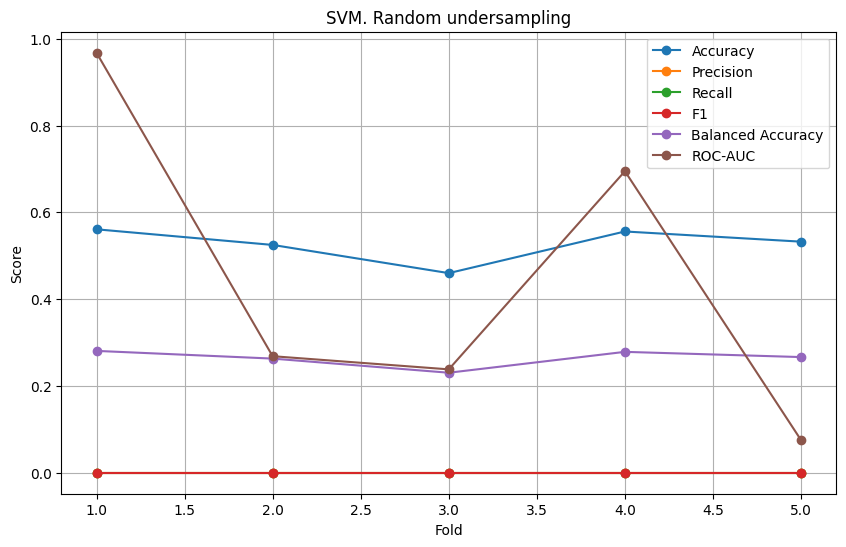

In [31]:
model = SVC(probability=True)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(X_train.shape, X_test.shape)
    undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
    X_train, y_train = undersampler.fit_resample(X_train, y_train)
    print(X_train.shape, X_test.shape)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('SVM. Random undersampling')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

Clustering - oversampling

Fold 1:
  Accuracy: 0.5420, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2713, ROC-AUC: 0.2713
[[542 457]
 [  1   0]]
Fold 2:
  Accuracy: 0.4830, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2420, ROC-AUC: 0.2420
[[483 515]
 [  2   0]]
Fold 3:
  Accuracy: 0.4750, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2380, ROC-AUC: 0.2380
[[475 523]
 [  2   0]]
Fold 4:
  Accuracy: 0.5520, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2766, ROC-AUC: 0.2766
[[552 446]
 [  2   0]]
Fold 5:
  Accuracy: 0.5375, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2690, ROC-AUC: 0.2690
[[537 461]
 [  1   0]]
Mean Accuracy: 0.5179
Mean Precision: 0.0000
Mean Recall: 0.0000
Mean F1: 0.0000
Mean Balanced Accuracy: 0.2594
Mean ROC-AUC: 0.2594


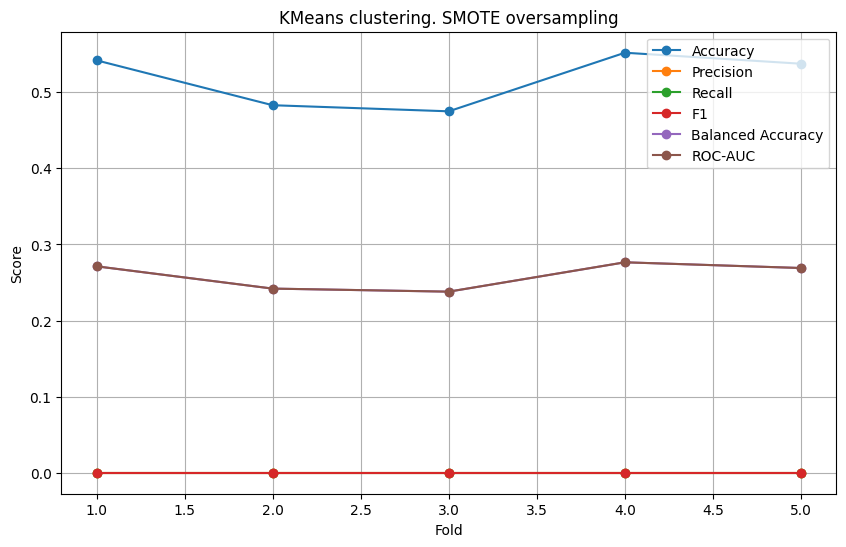

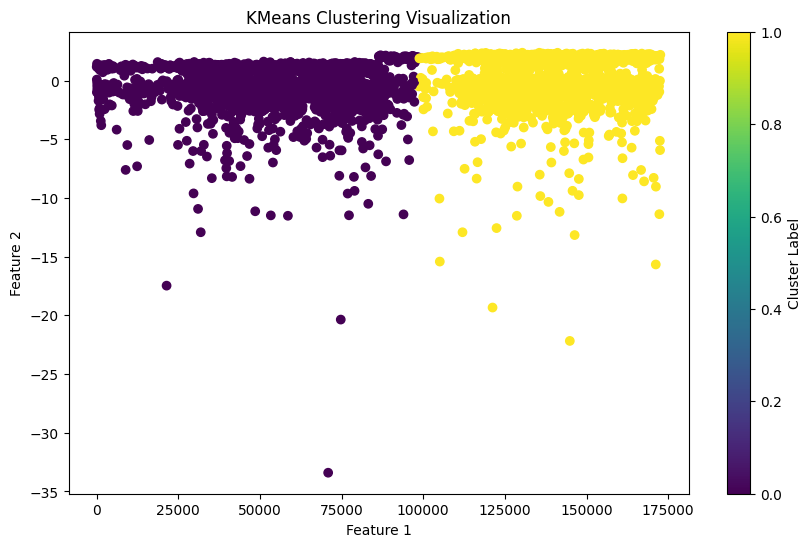

In [45]:
model = KMeans(n_clusters=2, random_state=42)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)

    cluster_labels = pd.Series(model.labels_)
    cluster_to_label = cluster_labels.groupby(cluster_labels).apply(lambda x: y_train.iloc[x.index].mode()[0])
    
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred).map(cluster_to_label).to_numpy()

    # y_pred = model.predict(X_test)
    # y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('KMeans clustering. SMOTE oversampling')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

model.fit(X)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=model.labels_, cmap='viridis')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

Clustering - undersampling

Fold 1:
  Accuracy: 0.5460, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2733, ROC-AUC: 0.2733
[[546 453]
 [  1   0]]
Fold 2:
  Accuracy: 0.4740, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2375, ROC-AUC: 0.2375
[[474 524]
 [  2   0]]
Fold 3:
  Accuracy: 0.5280, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2645, ROC-AUC: 0.2645
[[528 470]
 [  2   0]]
Fold 4:
  Accuracy: 0.5470, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2740, ROC-AUC: 0.2740
[[547 451]
 [  2   0]]
Fold 5:
  Accuracy: 0.5325, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  Balanced Accuracy: 0.2665, ROC-AUC: 0.2665
[[532 466]
 [  1   0]]
Mean Accuracy: 0.5255
Mean Precision: 0.0000
Mean Recall: 0.0000
Mean F1: 0.0000
Mean Balanced Accuracy: 0.2632
Mean ROC-AUC: 0.2632


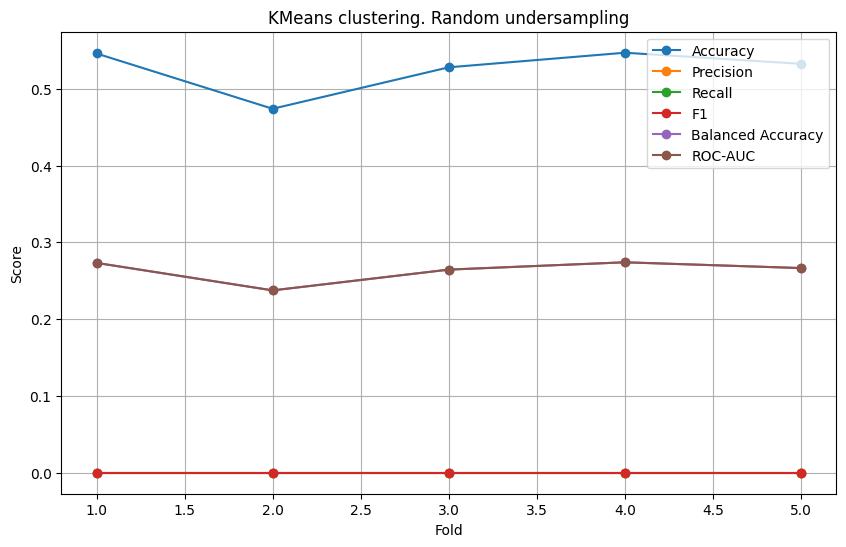

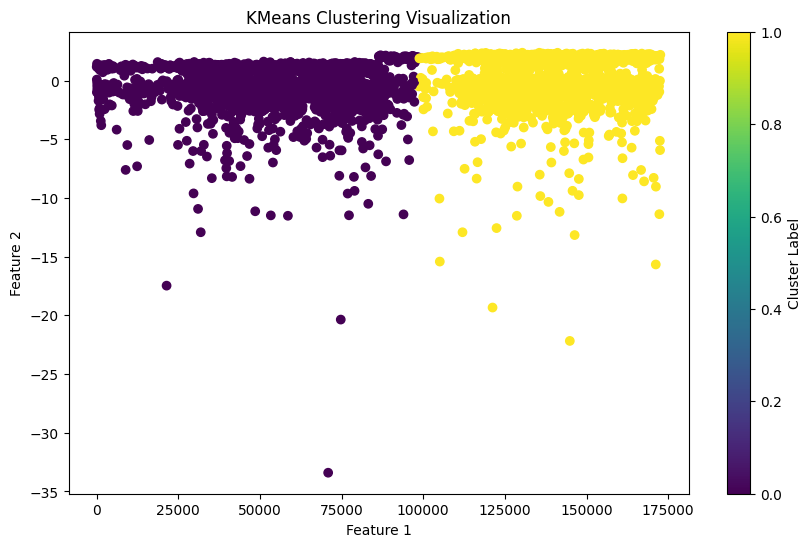

In [46]:
model = KMeans(n_clusters=2, random_state=42)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
    X_train, y_train = undersampler.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)

    cluster_labels = pd.Series(model.labels_)
    cluster_to_label = cluster_labels.groupby(cluster_labels).apply(lambda x: y_train.iloc[x.index].mode()[0])
    
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred).map(cluster_to_label).to_numpy()

    # y_pred = model.predict(X_test)
    # y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('KMeans clustering. Random undersampling')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

model.fit(X)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=model.labels_, cmap='viridis')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

EasyEnsambleClassifier

Fold 1:
  Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
  Balanced Accuracy: 1.0000, ROC-AUC: 1.0000
[[999   0]
 [  0   1]]
Fold 2:
  Accuracy: 0.9950, Precision: 0.2857, Recall: 1.0000, F1: 0.4444
  Balanced Accuracy: 0.9975, ROC-AUC: 1.0000
[[993   5]
 [  0   2]]
Fold 3:
  Accuracy: 0.9980, Precision: 0.5000, Recall: 0.5000, F1: 0.5000
  Balanced Accuracy: 0.7495, ROC-AUC: 0.9990
[[997   1]
 [  1   1]]
Fold 4:
  Accuracy: 0.9910, Precision: 0.1818, Recall: 1.0000, F1: 0.3077
  Balanced Accuracy: 0.9955, ROC-AUC: 1.0000
[[989   9]
 [  0   2]]
Fold 5:
  Accuracy: 0.9930, Precision: 0.1250, Recall: 1.0000, F1: 0.2222
  Balanced Accuracy: 0.9965, ROC-AUC: 1.0000
[[991   7]
 [  0   1]]
Mean Accuracy: 0.9954
Mean Precision: 0.4185
Mean Recall: 0.9000
Mean F1: 0.4949
Mean Balanced Accuracy: 0.9478
Mean ROC-AUC: 0.9998


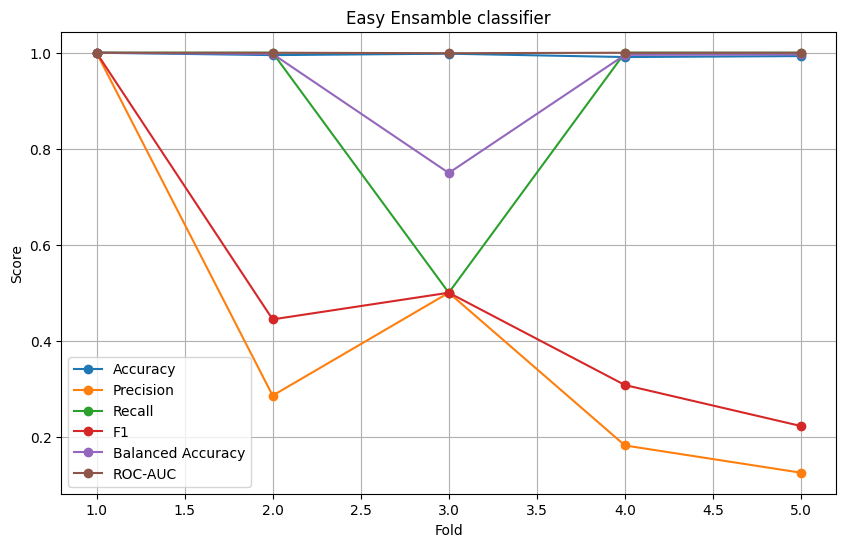

In [38]:
model = EasyEnsembleClassifier(n_estimators=10, random_state=42)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('Easy Ensamble classifier')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

RUSBoostClassifier

Fold 1:
  Accuracy: 0.9990, Precision: 0.5000, Recall: 1.0000, F1: 0.6667
  Balanced Accuracy: 0.9995, ROC-AUC: 1.0000
[[998   1]
 [  0   1]]
Fold 2:
  Accuracy: 0.9940, Precision: 0.2500, Recall: 1.0000, F1: 0.4000
  Balanced Accuracy: 0.9970, ROC-AUC: 1.0000
[[992   6]
 [  0   2]]
Fold 3:
  Accuracy: 0.9990, Precision: 0.6667, Recall: 1.0000, F1: 0.8000
  Balanced Accuracy: 0.9995, ROC-AUC: 0.9995
[[997   1]
 [  0   2]]
Fold 4:
  Accuracy: 0.9980, Precision: 0.5000, Recall: 1.0000, F1: 0.6667
  Balanced Accuracy: 0.9990, ROC-AUC: 1.0000
[[996   2]
 [  0   2]]
Fold 5:
  Accuracy: 0.9990, Precision: 0.5000, Recall: 1.0000, F1: 0.6667
  Balanced Accuracy: 0.9995, ROC-AUC: 1.0000
[[997   1]
 [  0   1]]
Mean Accuracy: 0.9978
Mean Precision: 0.4833
Mean Recall: 1.0000
Mean F1: 0.6400
Mean Balanced Accuracy: 0.9989
Mean ROC-AUC: 0.9999


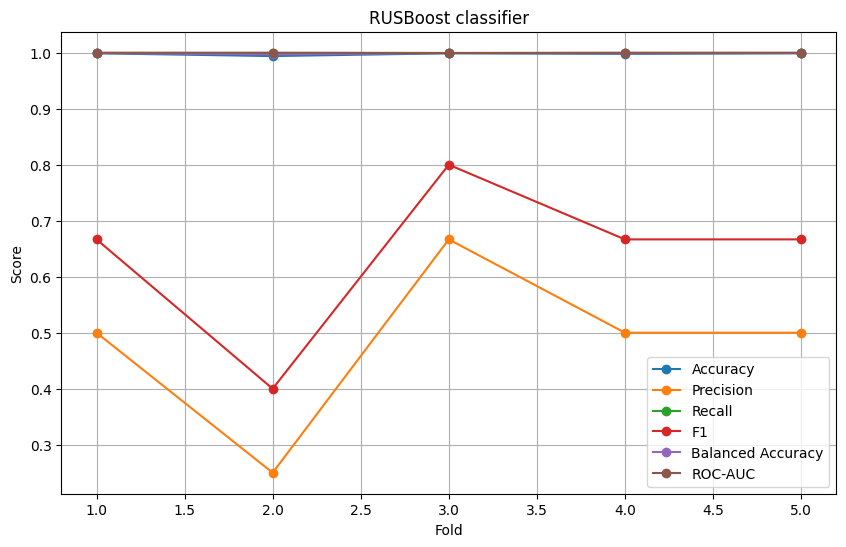

In [37]:
model = RUSBoostClassifier(n_estimators=100, random_state=42)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('RUSBoost classifier')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

BalancedBaggingClassifier

Fold 1:
  Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
  Balanced Accuracy: 1.0000, ROC-AUC: 1.0000
[[999   0]
 [  0   1]]
Fold 2:
  Accuracy: 0.9980, Precision: 0.5000, Recall: 1.0000, F1: 0.6667
  Balanced Accuracy: 0.9990, ROC-AUC: 0.9992
[[996   2]
 [  0   2]]
Fold 3:
  Accuracy: 0.9980, Precision: 0.5000, Recall: 0.5000, F1: 0.5000
  Balanced Accuracy: 0.7495, ROC-AUC: 0.9990
[[997   1]
 [  1   1]]
Fold 4:
  Accuracy: 0.9990, Precision: 0.6667, Recall: 1.0000, F1: 0.8000
  Balanced Accuracy: 0.9995, ROC-AUC: 1.0000
[[997   1]
 [  0   2]]
Fold 5:
  Accuracy: 0.9990, Precision: 0.5000, Recall: 1.0000, F1: 0.6667
  Balanced Accuracy: 0.9995, ROC-AUC: 1.0000
[[997   1]
 [  0   1]]
Mean Accuracy: 0.9988
Mean Precision: 0.6333
Mean Recall: 0.9000
Mean F1: 0.7267
Mean Balanced Accuracy: 0.9495
Mean ROC-AUC: 0.9996


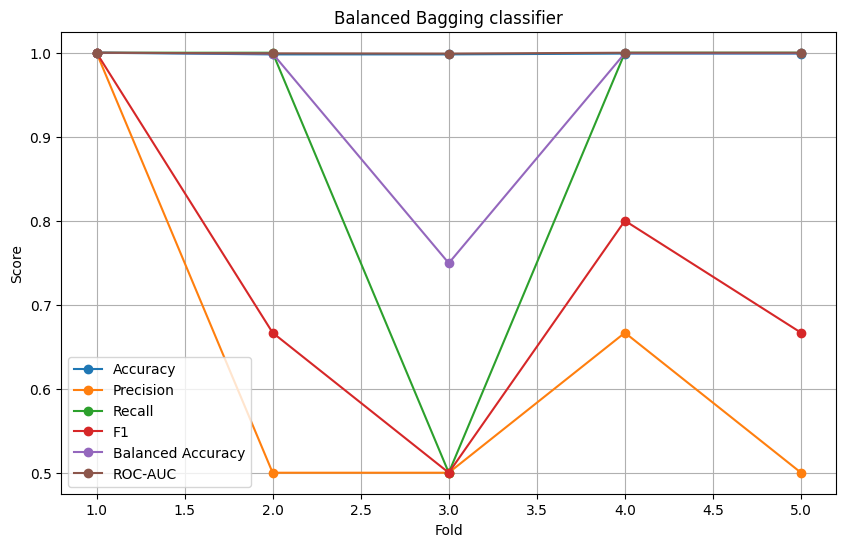

In [35]:
model = BalancedBaggingClassifier(n_estimators=10, random_state=42)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('Balanced Bagging classifier')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

BalancedRandomForestClassifier

c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: T

Fold 1:
  Accuracy: 0.9990, Precision: 0.5000, Recall: 1.0000, F1: 0.6667
  Balanced Accuracy: 0.9995, ROC-AUC: 1.0000
[[998   1]
 [  0   1]]


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: T

Fold 2:
  Accuracy: 0.9990, Precision: 0.6667, Recall: 1.0000, F1: 0.8000
  Balanced Accuracy: 0.9995, ROC-AUC: 1.0000
[[997   1]
 [  0   2]]


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: T

Fold 3:
  Accuracy: 0.9990, Precision: 0.6667, Recall: 1.0000, F1: 0.8000
  Balanced Accuracy: 0.9995, ROC-AUC: 0.9995
[[997   1]
 [  0   2]]


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: T

Fold 4:
  Accuracy: 0.9990, Precision: 0.6667, Recall: 1.0000, F1: 0.8000
  Balanced Accuracy: 0.9995, ROC-AUC: 1.0000
[[997   1]
 [  0   2]]


c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\University Projects\mgr s2\Machine_Learning\Imbalanced_Data_Classification_Optimization_Techniques\venv\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: T

Fold 5:
  Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
  Balanced Accuracy: 1.0000, ROC-AUC: 1.0000
[[998   0]
 [  0   1]]
Mean Accuracy: 0.9992
Mean Precision: 0.7000
Mean Recall: 1.0000
Mean F1: 0.8133
Mean Balanced Accuracy: 0.9996
Mean ROC-AUC: 0.9999


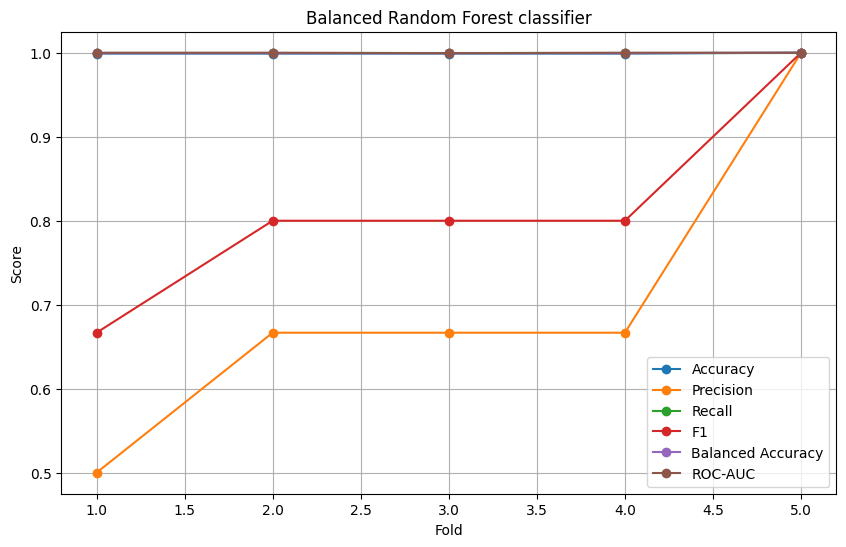

In [36]:
model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
accuracies = []
precisions = []
recalls = []
f1s = []
balanced_accuracies = []
roc_aucs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # probabilities for positive class
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    balanced_accuracies.append(bal_acc)
    roc_aucs.append(roc_auc)

    print(f'Fold {i + 1}:')
    print(f'  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  Balanced Accuracy: {bal_acc:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Mean Precision: {np.mean(precisions):.4f}')
print(f'Mean Recall: {np.mean(recalls):.4f}')
print(f'Mean F1: {np.mean(f1s):.4f}')
print(f'Mean Balanced Accuracy: {np.mean(balanced_accuracies):.4f}')
print(f'Mean ROC-AUC: {np.mean(roc_aucs):.4f}')

metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'Balanced Accuracy': balanced_accuracies,
    'ROC-AUC': roc_aucs,
}

# Plot
plt.figure(figsize=(10, 6))
for metric_name, values in metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric_name)

plt.title('Balanced Random Forest classifier')  
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

ADA-Boost Classifier

Custom ADA-Boost

Custom ADA-Boost - testing